In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dados_Indendio.csv', encoding='latin-1')
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


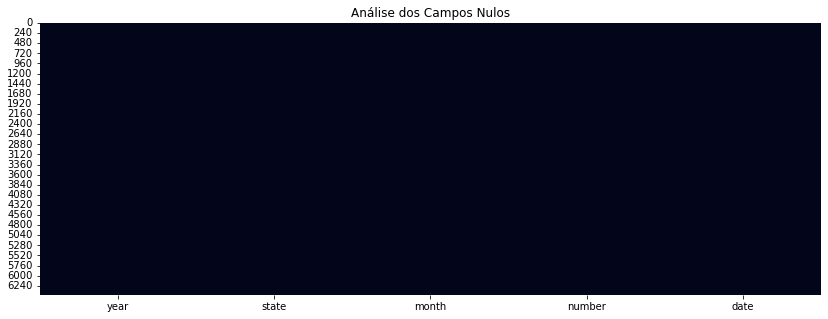

In [3]:
plt.figure(figsize=(14,5))
plt.title("Análise dos Campos Nulos")
sns.heatmap(df.isnull(), cbar=False);

In [4]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


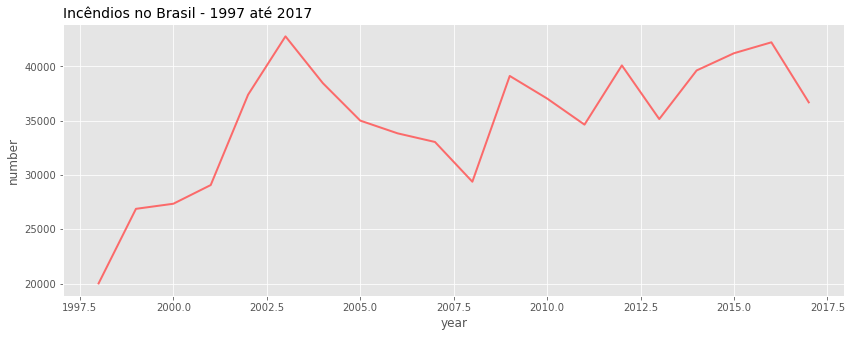

In [5]:
por_ano = df.groupby(by='year').sum().reset_index()
plt.figure(figsize=(14,5))
plt.style.use('ggplot')
plt.title('Incêndios no Brasil - 1997 até 2017', loc="left", fontsize=14)
sns.lineplot(data=por_ano, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85);

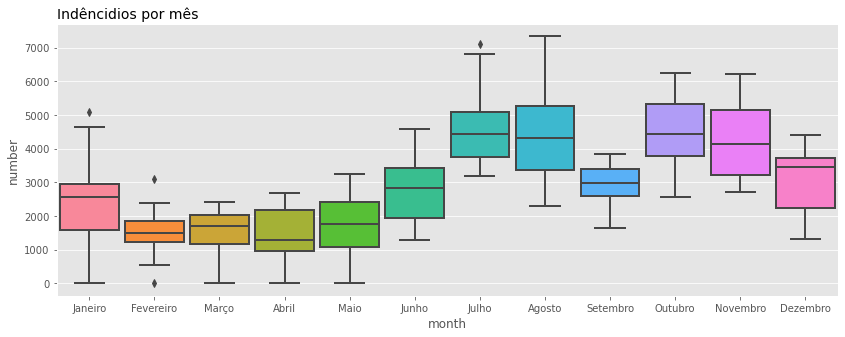

In [6]:
por_mes_ano = df.groupby(by=['month', 'year']).sum().reset_index()
plt.figure(figsize=(14,5))
plt.title( 'Indêncidios por mês', loc='left', fontsize=14 )

sns.boxplot(data=por_mes_ano, 
            x='month', 
            y='number', 
            saturation = 1, 
            width=0.9, 
            linewidth=2, 
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']);

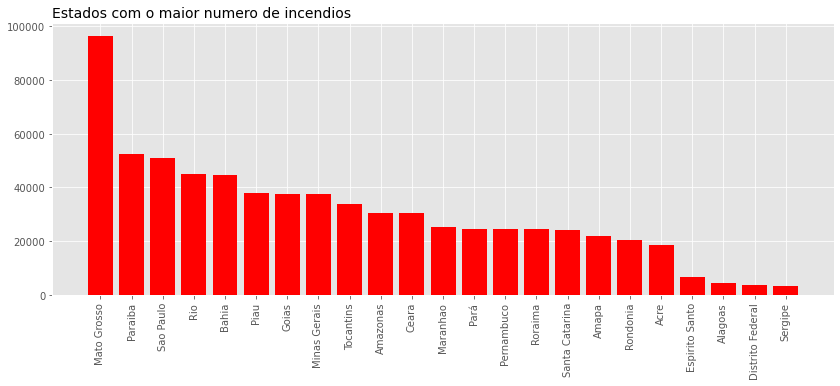

In [7]:
# número de incendios por estado
plt.figure(figsize=(14,5))
plt.title('Estados com o maior numero de incendios', loc='left', fontsize=14)
a3 = df.groupby(by=['state']).sum().reset_index()[['state', 'number']].sort_values('number', ascending=False)
plt.bar(a3.state, a3['number'], color='red')
plt.xticks(rotation=90);

#### Criando um TOP 10 Estados

In [8]:
# Criando a lista
lista_top_10 = a3['state'][0:10].values
lista_top_10

array(['Mato Grosso', 'Paraiba', 'Sao Paulo', 'Rio', 'Bahia', 'Piau',
       'Goias', 'Minas Gerais', 'Tocantins', 'Amazonas'], dtype=object)

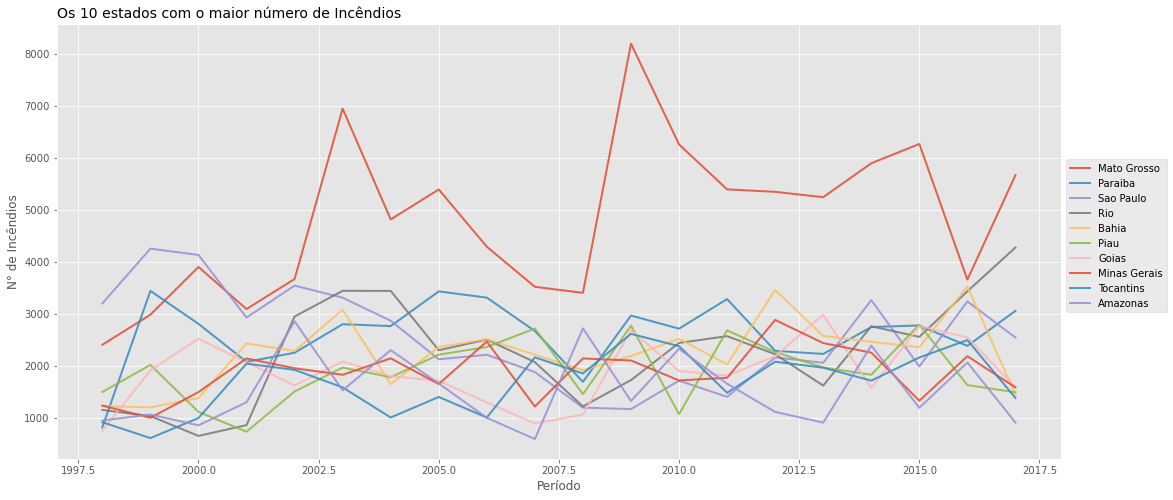

In [9]:
# Criando figura e botando tamanho
plt.figure(figsize=(18,8))
# Título
plt.title("Os 10 estados com o maior número de Incêndios", loc='left', fontsize=14)

for coluna in lista_top_10:
    # fazendo o filtro do estado
    filtro = df.loc[df['state']==coluna]
    # agrupando
    al = filtro.groupby(by=['year']).sum().reset_index()
    # fazendo o plt
    sns.lineplot(data=al, x='year', y='number', lw=2, alpha=0.85)

plt.xlabel('Período', fontsize=12)
plt.ylabel('N° de Incêndios', fontsize=12)

plt.legend(lista_top_10, bbox_to_anchor=(1,0.7))

#### Análise Geográfica

In [14]:
# Gerando os estados
Estados = a3.sort_values('state')['state'].values

# Gerando os valores
Valores = a3.sort_values('state')['number'].values


# Latitudes
Lat = [ -8.77, -9.71,1.41, -3.07,-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,-12.64,
       -18.10, -7.06, -5.53, -8.28, -8.28,-22.84,-11.22,1.89,-27.33,-23.55,-10.90,-10.25 ]

# Longitudes
Log = [ -70.55, -35.73, -51.77, -61.66, -38.51, -38.54, -47.86, -40.34, -49.31, -44.30, -55.42, -44.38, 
       -35.55, -52.29, -35.07, -43.68, -43.15, -62.80, -61.22, -49.44, -46.64, -37.07, -48.25 ]

d = {
    'Estados': Estados,
    'Latitude':Lat,
    'Longitude':Log,
    'Incêndios': Valores
}

# convertendo
geo = pd.DataFrame(d)

# exibindo
geo

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226
5,Ceara,-3.71,-38.54,30428.063
6,Distrito Federal,-15.83,-47.86,3561.000
7,Espirito Santo,-19.19,-40.34,6546.000
8,Goias,-16.64,-49.31,37695.520
9,Maranhao,-2.55,-44.30,25129.131


##### Exibindo o Gráfico

In [24]:
px.density_mapbox(geo, 
                  lat='Latitude', 
                  lon='Longitude', 
                  z='Incêndios', 
                  radius=30, 
                  center=dict(lat=-12.700, lon=-46.5555),
                  zoom=3, 
                  mapbox_style='stamen-terrain')